# Keras - Dense neural network

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_ytrevikna_simple.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 16 columns):
YVIK-YtreVikna1-Sum-produksjon       5222 non-null float64
DNMI_75410...........T0015A3-0120    5237 non-null float64
/arome_windvel_6481_1056             5190 non-null float64
DNMI_75220...........T0015A3-0120    5237 non-null float64
/arome_windvel_6482_1114             5190 non-null float64
DNMI_75550...........T0015A3-0120    5237 non-null float64
/arome_windvel_6520_1098             5190 non-null float64
STORM-YVik1-Vindhast-25km            5237 non-null float64
STORM-YVik1-Vindretn-25km            5237 non-null int64
/arome_windvel_6495_1081             5190 non-null float64
/arome_windvel_6495_1096             5190 non-null float64
/arome_airtemp_6491_1087             5190 non-null float64
/arome_windvel_6491_1087             5190 non-null float64
/arome_windvel_6486_1082             5190 non-null float64
/arome_windvel_6486_1093             5190 non-null float64
Target    

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 5236
Data columns (total 16 columns):
YVIK-YtreVikna1-Sum-produksjon       5165 non-null float64
DNMI_75410...........T0015A3-0120    5165 non-null float64
/arome_windvel_6481_1056             5165 non-null float64
DNMI_75220...........T0015A3-0120    5165 non-null float64
/arome_windvel_6482_1114             5165 non-null float64
DNMI_75550...........T0015A3-0120    5165 non-null float64
/arome_windvel_6520_1098             5165 non-null float64
STORM-YVik1-Vindhast-25km            5165 non-null float64
STORM-YVik1-Vindretn-25km            5165 non-null int64
/arome_windvel_6495_1081             5165 non-null float64
/arome_windvel_6495_1096             5165 non-null float64
/arome_airtemp_6491_1087             5165 non-null float64
/arome_windvel_6491_1087             5165 non-null float64
/arome_windvel_6486_1082             5165 non-null float64
/arome_windvel_6486_1093             5165 non-null float64
Target    

In [4]:
num_features = len(data.columns) -1
print(num_features)

15


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Train/test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

#### Skalere data

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# Keras

In [8]:
import tensorflow as tf

#### Importere modellen

In [9]:
from tensorflow.contrib.keras import models

In [10]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [11]:
from tensorflow.contrib.keras import layers

In [12]:
# Input layer
dnn_keras_model.add(layers.Dense(units=64, input_dim= num_features, activation='relu'))

In [13]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=32,activation='relu'))

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [14]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [15]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [16]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [17]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [18]:
from tensorflow.contrib.keras import callbacks

In [19]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_simple.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [20]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3615 samples, validate on 1550 samples
Epoch 1/10000
Epoch 00000: val_loss improved from inf to 4.14231, saving model to checkpoint_model_simple.h5
0s - loss: 6.7873 - val_loss: 4.1423
Epoch 2/10000
Epoch 00001: val_loss improved from 4.14231 to 3.71106, saving model to checkpoint_model_simple.h5
0s - loss: 3.7363 - val_loss: 3.7111
Epoch 3/10000
Epoch 00002: val_loss improved from 3.71106 to 3.18519, saving model to checkpoint_model_simple.h5
0s - loss: 3.3693 - val_loss: 3.1852
Epoch 4/10000
Epoch 00003: val_loss improved from 3.18519 to 3.14612, saving model to checkpoint_model_simple.h5
0s - loss: 3.1119 - val_loss: 3.1461
Epoch 5/10000
Epoch 00004: val_loss improved from 3.14612 to 3.04695, saving model to checkpoint_model_simple.h5
0s - loss: 3.0276 - val_loss: 3.0469
Epoch 6/10000
Epoch 00005: val_loss did not improve
0s - loss: 3.0344 - val_loss: 3.0839
Epoch 7/10000
Epoch 00006: val_loss did not improve
0s - loss: 3.0186 - val_loss: 3.1137
Epoch 8/10000
Epoch 00007: v

Epoch 00077: val_loss did not improve
0s - loss: 2.6403 - val_loss: 2.7084
Epoch 79/10000
Epoch 00078: val_loss did not improve
0s - loss: 2.6211 - val_loss: 2.7442
Epoch 80/10000
Epoch 00079: val_loss did not improve
0s - loss: 2.6263 - val_loss: 2.7233
Epoch 81/10000
Epoch 00080: val_loss did not improve
0s - loss: 2.6550 - val_loss: 2.8184
Epoch 82/10000
Epoch 00081: val_loss improved from 2.70254 to 2.69242, saving model to checkpoint_model_simple.h5
0s - loss: 2.6066 - val_loss: 2.6924
Epoch 83/10000
Epoch 00082: val_loss did not improve
0s - loss: 2.6458 - val_loss: 2.8507
Epoch 84/10000
Epoch 00083: val_loss did not improve
0s - loss: 2.5816 - val_loss: 2.7657
Epoch 85/10000
Epoch 00084: val_loss did not improve
0s - loss: 2.5887 - val_loss: 2.7269
Epoch 86/10000
Epoch 00085: val_loss did not improve
0s - loss: 2.6576 - val_loss: 2.6962
Epoch 87/10000
Epoch 00086: val_loss did not improve
0s - loss: 2.6115 - val_loss: 2.7249
Epoch 88/10000
Epoch 00087: val_loss did not improve
0

Epoch 00164: val_loss did not improve
0s - loss: 2.4709 - val_loss: 2.6685
Epoch 166/10000
Epoch 00165: val_loss did not improve
0s - loss: 2.5415 - val_loss: 2.6963
Epoch 167/10000
Epoch 00166: val_loss did not improve
0s - loss: 2.5470 - val_loss: 2.9442
Epoch 168/10000
Epoch 00167: val_loss did not improve
0s - loss: 2.5388 - val_loss: 2.8522
Epoch 169/10000
Epoch 00168: val_loss did not improve
0s - loss: 2.5654 - val_loss: 2.6787
Epoch 170/10000
Epoch 00169: val_loss did not improve
0s - loss: 2.4879 - val_loss: 2.7037
Epoch 171/10000
Epoch 00170: val_loss did not improve
0s - loss: 2.4987 - val_loss: 2.7351
Epoch 172/10000
Epoch 00171: val_loss did not improve
0s - loss: 2.4897 - val_loss: 2.6874
Epoch 173/10000
Epoch 00172: val_loss did not improve
0s - loss: 2.5258 - val_loss: 2.6974
Epoch 174/10000
Epoch 00173: val_loss did not improve
0s - loss: 2.5085 - val_loss: 2.9047
Epoch 175/10000
Epoch 00174: val_loss did not improve
0s - loss: 2.5187 - val_loss: 2.7335
Epoch 176/10000

Epoch 00251: val_loss did not improve
0s - loss: 2.4355 - val_loss: 2.6923
Epoch 253/10000
Epoch 00252: val_loss did not improve
0s - loss: 2.4907 - val_loss: 2.7077
Epoch 254/10000
Epoch 00253: val_loss did not improve
0s - loss: 2.4406 - val_loss: 2.6351
Epoch 255/10000
Epoch 00254: val_loss did not improve
0s - loss: 2.4021 - val_loss: 2.6564
Epoch 256/10000
Epoch 00255: val_loss did not improve
0s - loss: 2.3947 - val_loss: 2.7215
Epoch 257/10000
Epoch 00256: val_loss did not improve
0s - loss: 2.4225 - val_loss: 2.6629
Epoch 258/10000
Epoch 00257: val_loss did not improve
0s - loss: 2.4073 - val_loss: 2.7881
Epoch 259/10000
Epoch 00258: val_loss did not improve
0s - loss: 2.4377 - val_loss: 2.6824
Epoch 260/10000
Epoch 00259: val_loss did not improve
0s - loss: 2.4542 - val_loss: 2.6763
Epoch 261/10000
Epoch 00260: val_loss did not improve
0s - loss: 2.4931 - val_loss: 2.6681
Epoch 262/10000
Epoch 00261: val_loss did not improve
0s - loss: 2.4645 - val_loss: 2.9717
Epoch 263/10000

Epoch 00341: val_loss did not improve
0s - loss: 2.5275 - val_loss: 2.7982
Epoch 343/10000
Epoch 00342: val_loss did not improve
0s - loss: 2.3896 - val_loss: 2.6326
Epoch 344/10000
Epoch 00343: val_loss did not improve
0s - loss: 2.3317 - val_loss: 2.6416
Epoch 345/10000
Epoch 00344: val_loss did not improve
0s - loss: 2.3765 - val_loss: 2.6605
Epoch 346/10000
Epoch 00345: val_loss did not improve
0s - loss: 2.3267 - val_loss: 2.6339
Epoch 347/10000
Epoch 00346: val_loss did not improve
0s - loss: 2.3234 - val_loss: 2.6467
Epoch 348/10000
Epoch 00347: val_loss did not improve
0s - loss: 2.3421 - val_loss: 2.7674
Epoch 349/10000
Epoch 00348: val_loss did not improve
0s - loss: 2.3807 - val_loss: 2.6719
Epoch 350/10000
Epoch 00349: val_loss did not improve
0s - loss: 2.3927 - val_loss: 2.6552
Epoch 351/10000
Epoch 00350: val_loss did not improve
0s - loss: 2.4130 - val_loss: 2.5922
Epoch 352/10000
Epoch 00351: val_loss improved from 2.58314 to 2.57206, saving model to checkpoint_model_s

Epoch 00431: val_loss did not improve
0s - loss: 2.2882 - val_loss: 2.7020
Epoch 433/10000
Epoch 00432: val_loss did not improve
0s - loss: 2.3162 - val_loss: 2.5927
Epoch 434/10000
Epoch 00433: val_loss did not improve
0s - loss: 2.2891 - val_loss: 2.6061
Epoch 435/10000
Epoch 00434: val_loss did not improve
0s - loss: 2.2760 - val_loss: 2.6324
Epoch 436/10000
Epoch 00435: val_loss did not improve
0s - loss: 2.2729 - val_loss: 2.6293
Epoch 437/10000
Epoch 00436: val_loss did not improve
0s - loss: 2.3190 - val_loss: 2.7743
Epoch 438/10000
Epoch 00437: val_loss did not improve
0s - loss: 2.3213 - val_loss: 2.6385
Epoch 439/10000
Epoch 00438: val_loss did not improve
0s - loss: 2.3517 - val_loss: 2.6012
Epoch 440/10000
Epoch 00439: val_loss did not improve
0s - loss: 2.2999 - val_loss: 2.7274
Epoch 441/10000
Epoch 00440: val_loss did not improve
0s - loss: 2.2967 - val_loss: 2.6461
Epoch 442/10000
Epoch 00441: val_loss did not improve
0s - loss: 2.3077 - val_loss: 2.5906
Epoch 443/10000

Epoch 00523: val_loss did not improve
0s - loss: 2.2475 - val_loss: 2.5813
Epoch 525/10000
Epoch 00524: val_loss did not improve
0s - loss: 2.2392 - val_loss: 2.6840
Epoch 526/10000
Epoch 00525: val_loss did not improve
0s - loss: 2.2221 - val_loss: 2.6594
Epoch 527/10000
Epoch 00526: val_loss did not improve
0s - loss: 2.3016 - val_loss: 2.5901
Epoch 528/10000
Epoch 00527: val_loss did not improve
0s - loss: 2.2896 - val_loss: 2.5793
Epoch 529/10000
Epoch 00528: val_loss did not improve
0s - loss: 2.2367 - val_loss: 2.5865
Epoch 530/10000
Epoch 00529: val_loss did not improve
0s - loss: 2.2367 - val_loss: 2.7076
Epoch 531/10000
Epoch 00530: val_loss did not improve
0s - loss: 2.2282 - val_loss: 2.6047
Epoch 532/10000
Epoch 00531: val_loss did not improve
0s - loss: 2.1962 - val_loss: 2.6021
Epoch 533/10000
Epoch 00532: val_loss did not improve
0s - loss: 2.2217 - val_loss: 2.6051
Epoch 534/10000
Epoch 00533: val_loss did not improve
0s - loss: 2.2228 - val_loss: 2.5911
Epoch 535/10000

Epoch 00614: val_loss did not improve
0s - loss: 2.1468 - val_loss: 2.6056
Epoch 616/10000
Epoch 00615: val_loss did not improve
0s - loss: 2.1823 - val_loss: 2.6127
Epoch 617/10000
Epoch 00616: val_loss did not improve
0s - loss: 2.2113 - val_loss: 2.6293
Epoch 618/10000
Epoch 00617: val_loss did not improve
0s - loss: 2.2048 - val_loss: 2.6058
Epoch 619/10000
Epoch 00618: val_loss did not improve
0s - loss: 2.1650 - val_loss: 2.6050
Epoch 620/10000
Epoch 00619: val_loss did not improve
0s - loss: 2.2331 - val_loss: 2.5588
Epoch 621/10000
Epoch 00620: val_loss did not improve
0s - loss: 2.1621 - val_loss: 2.6220
Epoch 622/10000
Epoch 00621: val_loss did not improve
0s - loss: 2.1728 - val_loss: 2.6406
Epoch 623/10000
Epoch 00622: val_loss did not improve
0s - loss: 2.1726 - val_loss: 2.7036
Epoch 624/10000
Epoch 00623: val_loss did not improve
0s - loss: 2.1729 - val_loss: 2.7133
Epoch 625/10000
Epoch 00624: val_loss did not improve
0s - loss: 2.2164 - val_loss: 2.7043
Epoch 626/10000

Epoch 00706: val_loss did not improve
0s - loss: 2.1800 - val_loss: 2.7196
Epoch 708/10000
Epoch 00707: val_loss did not improve
0s - loss: 2.1542 - val_loss: 2.6324
Epoch 709/10000
Epoch 00708: val_loss did not improve
0s - loss: 2.1443 - val_loss: 2.6098
Epoch 710/10000
Epoch 00709: val_loss did not improve
0s - loss: 2.1126 - val_loss: 2.6059
Epoch 711/10000
Epoch 00710: val_loss did not improve
0s - loss: 2.1272 - val_loss: 2.6355
Epoch 712/10000
Epoch 00711: val_loss did not improve
0s - loss: 2.1480 - val_loss: 2.6100
Epoch 713/10000
Epoch 00712: val_loss did not improve
0s - loss: 2.1533 - val_loss: 2.6946
Epoch 714/10000
Epoch 00713: val_loss did not improve
0s - loss: 2.2216 - val_loss: 2.5934
Epoch 715/10000
Epoch 00714: val_loss did not improve
0s - loss: 2.1664 - val_loss: 2.6265
Epoch 716/10000
Epoch 00715: val_loss did not improve
0s - loss: 2.1680 - val_loss: 2.6349
Epoch 717/10000
Epoch 00716: val_loss did not improve
0s - loss: 2.2138 - val_loss: 2.8274
Epoch 718/10000

Epoch 00798: val_loss did not improve
0s - loss: 2.1050 - val_loss: 2.6223
Epoch 800/10000
Epoch 00799: val_loss did not improve
0s - loss: 2.1461 - val_loss: 2.5887
Epoch 801/10000
Epoch 00800: val_loss did not improve
0s - loss: 2.1123 - val_loss: 2.6331
Epoch 802/10000
Epoch 00801: val_loss did not improve
0s - loss: 2.0633 - val_loss: 2.6187
Epoch 803/10000
Epoch 00802: val_loss did not improve
0s - loss: 2.1452 - val_loss: 2.6598
Epoch 804/10000
Epoch 00803: val_loss did not improve
0s - loss: 2.1646 - val_loss: 2.6461
Epoch 805/10000
Epoch 00804: val_loss did not improve
0s - loss: 2.1707 - val_loss: 2.6100
Epoch 806/10000
Epoch 00805: val_loss did not improve
0s - loss: 2.1138 - val_loss: 2.6108
Epoch 807/10000
Epoch 00806: val_loss did not improve
0s - loss: 2.0874 - val_loss: 2.6259
Epoch 808/10000
Epoch 00807: val_loss did not improve
0s - loss: 2.1531 - val_loss: 2.5904
Epoch 809/10000
Epoch 00808: val_loss did not improve
0s - loss: 2.0796 - val_loss: 2.5872
Epoch 810/10000

Epoch 00890: val_loss did not improve
0s - loss: 2.0718 - val_loss: 2.5914
Epoch 892/10000
Epoch 00891: val_loss did not improve
0s - loss: 2.0713 - val_loss: 2.6817
Epoch 893/10000
Epoch 00892: val_loss did not improve
0s - loss: 2.0711 - val_loss: 2.5912
Epoch 894/10000
Epoch 00893: val_loss did not improve
0s - loss: 2.0550 - val_loss: 2.5901
Epoch 895/10000
Epoch 00894: val_loss did not improve
0s - loss: 2.0399 - val_loss: 2.6299
Epoch 896/10000
Epoch 00895: val_loss did not improve
0s - loss: 2.0388 - val_loss: 2.5904
Epoch 897/10000
Epoch 00896: val_loss did not improve
0s - loss: 2.0513 - val_loss: 2.6047
Epoch 898/10000
Epoch 00897: val_loss did not improve
0s - loss: 2.0270 - val_loss: 2.5903
Epoch 899/10000
Epoch 00898: val_loss did not improve
0s - loss: 2.1612 - val_loss: 2.7001
Epoch 900/10000
Epoch 00899: val_loss did not improve
0s - loss: 2.0638 - val_loss: 2.5893
Epoch 901/10000
Epoch 00900: val_loss did not improve
0s - loss: 2.0751 - val_loss: 2.6067
Epoch 902/10000

Epoch 00982: val_loss did not improve
0s - loss: 2.0756 - val_loss: 2.6526
Epoch 984/10000
Epoch 00983: val_loss did not improve
0s - loss: 2.0203 - val_loss: 2.6542
Epoch 985/10000
Epoch 00984: val_loss did not improve
0s - loss: 2.0447 - val_loss: 2.7338
Epoch 986/10000
Epoch 00985: val_loss did not improve
0s - loss: 2.0853 - val_loss: 2.5658
Epoch 987/10000
Epoch 00986: val_loss did not improve
0s - loss: 2.0706 - val_loss: 2.6649
Epoch 988/10000
Epoch 00987: val_loss did not improve
0s - loss: 2.0036 - val_loss: 2.6122
Epoch 989/10000
Epoch 00988: val_loss did not improve
0s - loss: 2.0056 - val_loss: 2.6069
Epoch 990/10000
Epoch 00989: val_loss did not improve
0s - loss: 2.0446 - val_loss: 2.6140
Epoch 991/10000
Epoch 00990: val_loss did not improve
0s - loss: 2.0490 - val_loss: 2.6034
Epoch 992/10000
Epoch 00991: val_loss did not improve
0s - loss: 2.0643 - val_loss: 2.5889
Epoch 993/10000
Epoch 00992: val_loss did not improve
0s - loss: 2.0386 - val_loss: 2.6289
Epoch 994/10000

# Resultater

In [21]:
from sklearn import metrics

In [22]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_simple.h5')

#### Prediksjon på testsett

In [23]:
final_preds = finished_model.predict(X_test)

In [24]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 2.53641
Mean Squared Error: 			 14.9742
Root Mean Squared Error: 		 3.86965


#### Prediksjon på treningdata

In [25]:
train_preds = finished_model.predict(X_train)

In [26]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 2.19592
Mean Squared Error: 			 11.7581
Root Mean Squared Error: 		 3.42901


# Visualisere resultater

#### Lager oversikt over testdataen

In [27]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [28]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

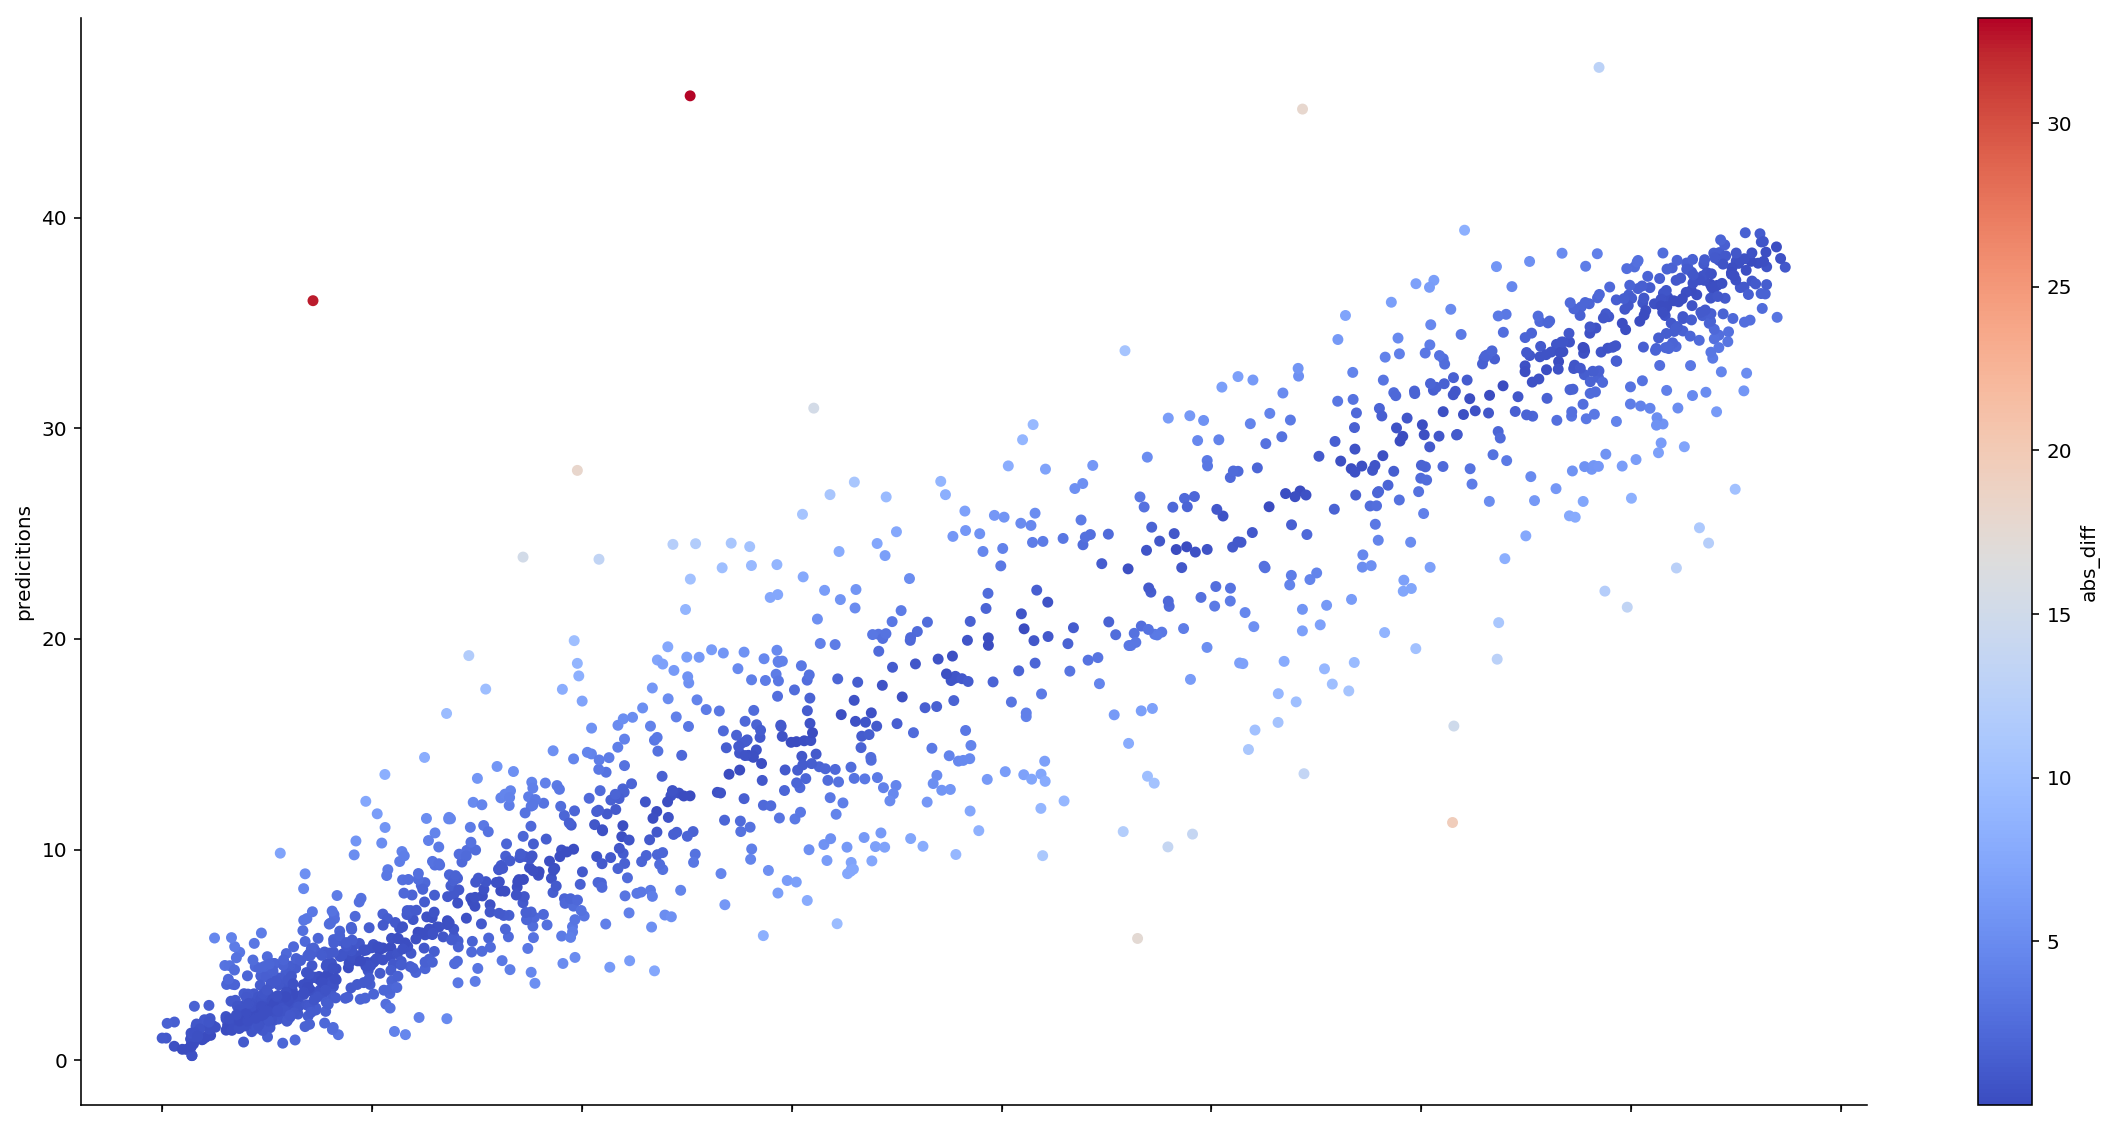

In [29]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

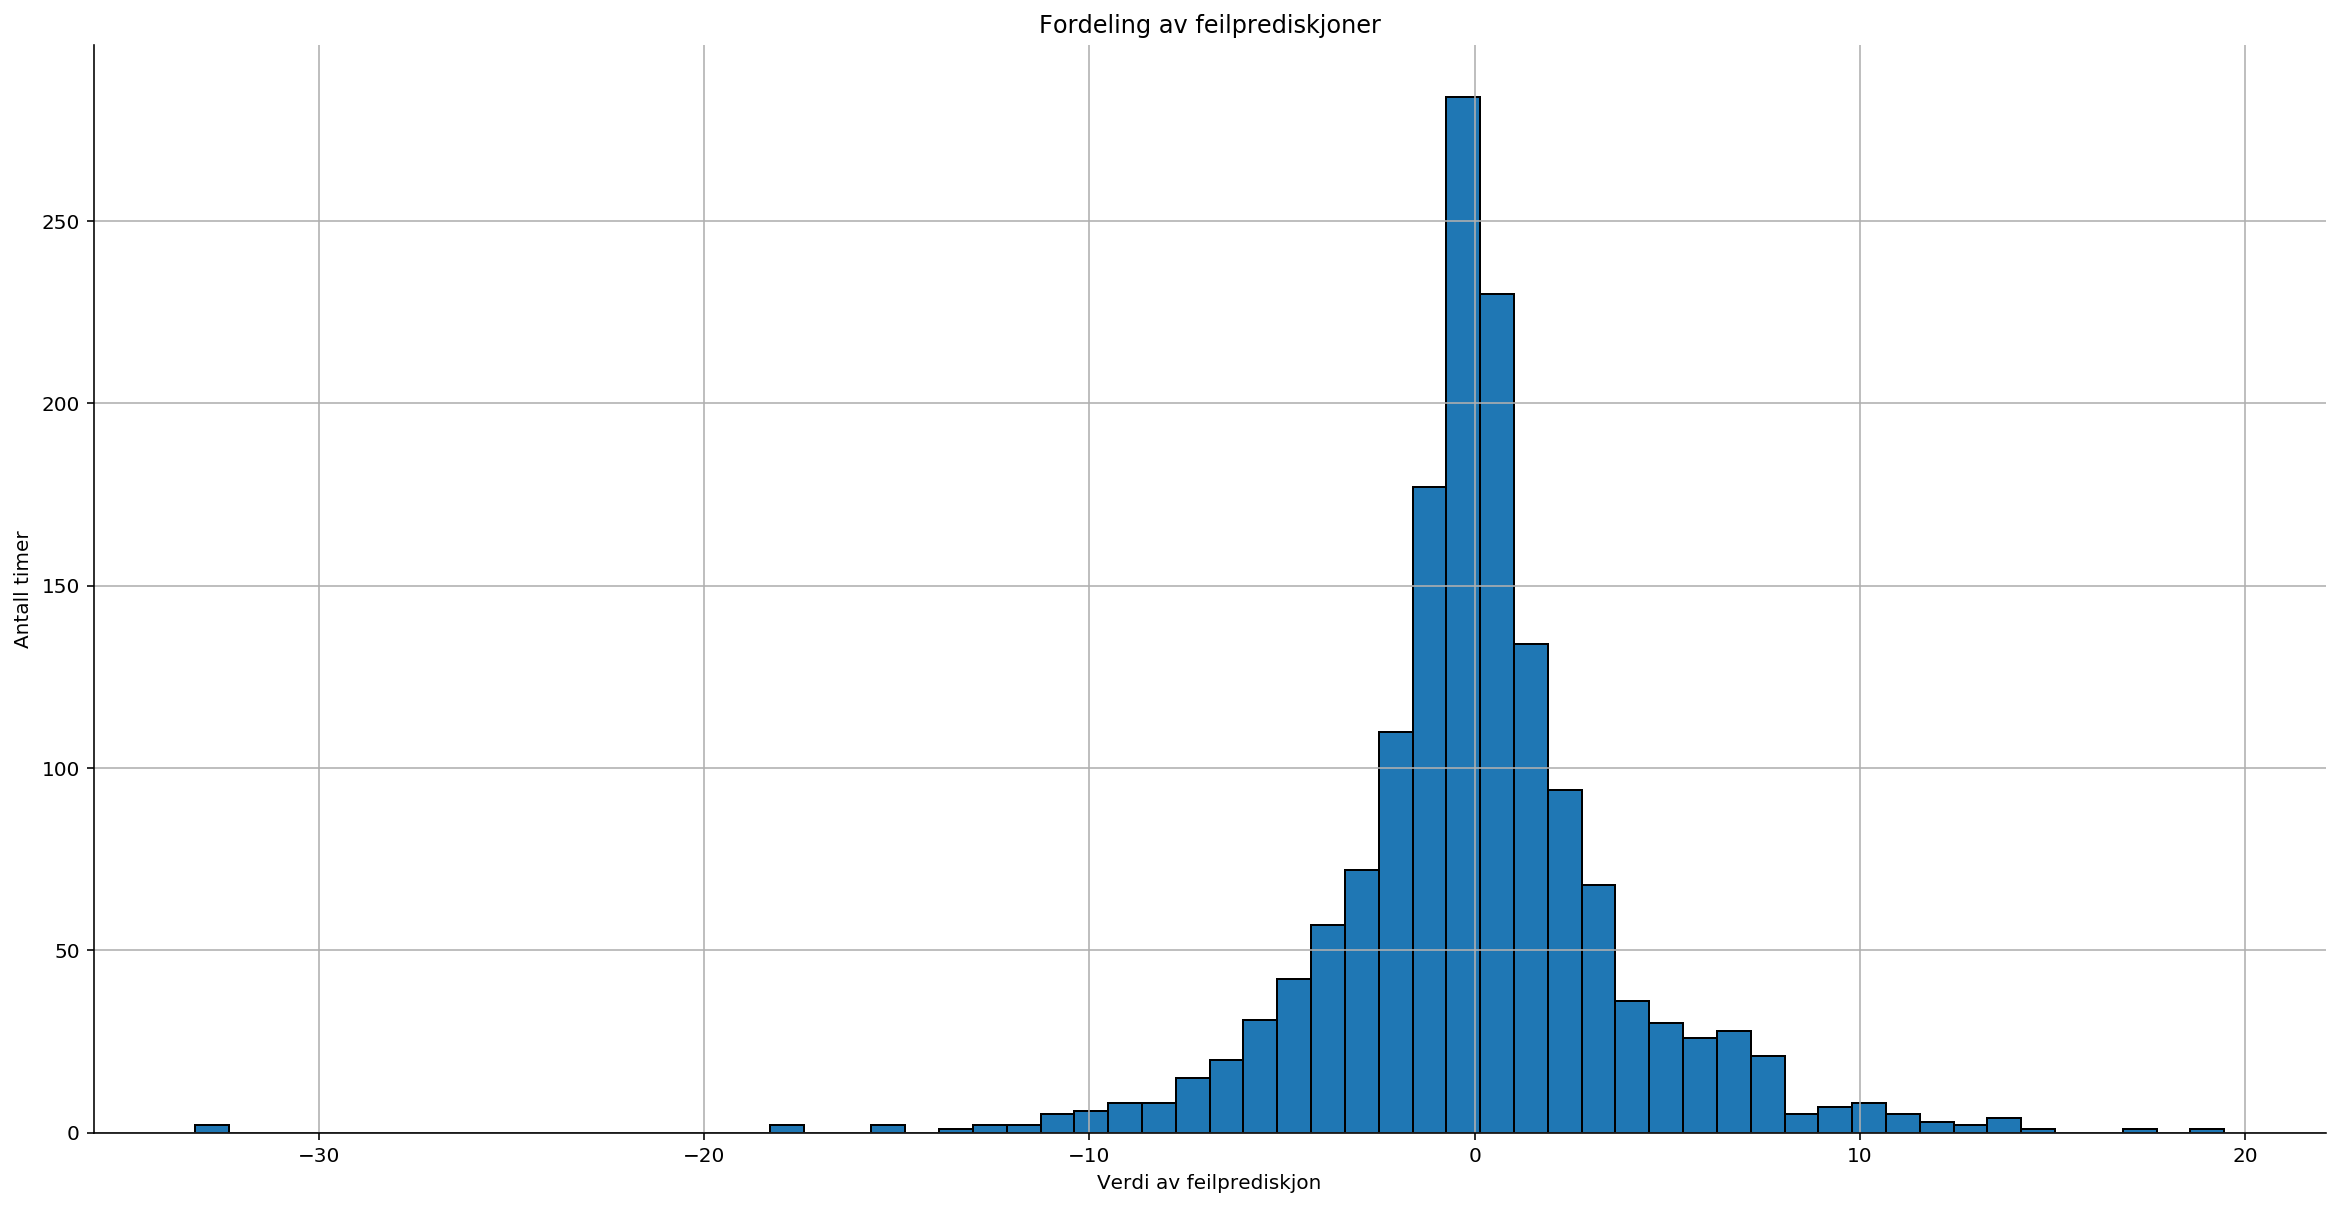

In [30]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [31]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

#### Tidsplot av data

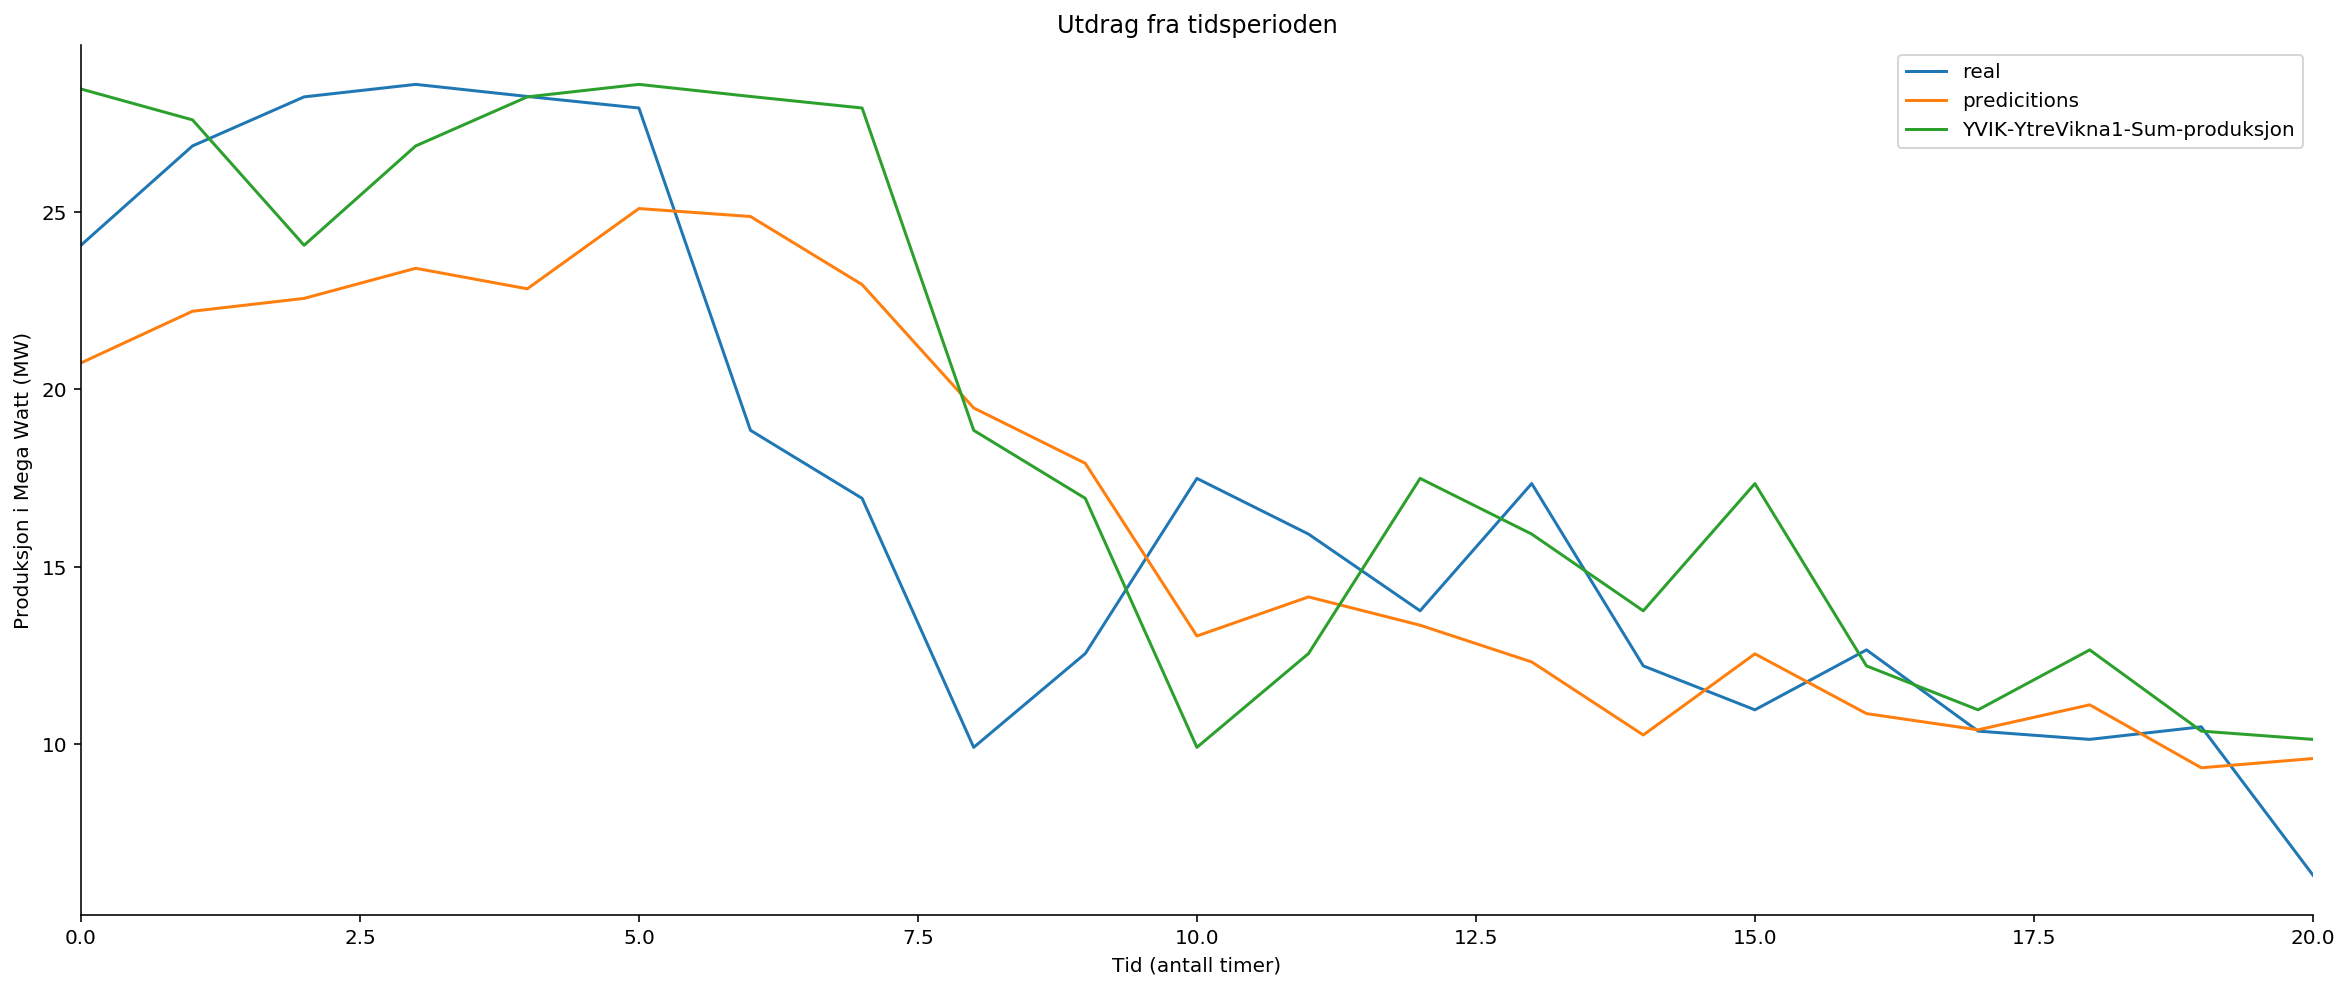

In [36]:
# Justere tidslinjen på plottet
start = 0
slutt = 20

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'YVIK-YtreVikna1-Sum-produksjon'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')